In [1]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [6]:
base_path = "/data/projects/Enhancer/RECOMB_2024/comparative_study/"

In [7]:
def all_classifier():
    # 1. Load the .npy files
    X_train = np.load(base_path+'train.npy')
    y_train = np.load(base_path+'train_labels.npy')
    X_test = np.load(base_path+'standalone_test.npy')
    y_test = np.load(base_path+'standalone_labels.npy')
    print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)
    
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    results = []
    
    classifiers = [
        ("Random Forest", RandomForestClassifier(n_estimators=100)),
        ("KNN", KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)),
        ("SVC_linear", SVC(kernel='linear', random_state=0)),
        ("SVC_svm", SVC(kernel='rbf', random_state=0)),
        ("Naïve Bayes(Gaussian)", GaussianNB()),
        ("AdaBoostClassifier", AdaBoostClassifier()),
        ("MLP Classifier", MLPClassifier(alpha=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 50,)))
    ]
    
    
    for name, clf in classifiers:
        print("{} classifier is running..".format(name))
        clf.fit(X_train, y_train)
        Y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, Y_pred)
        precision = precision_score(y_test, Y_pred, average='macro')
        recall = recall_score(y_test, Y_pred, average='macro')
        f1 = f1_score(y_test, Y_pred, average='macro')
        
        results.append({
            'Classifier': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
        print(name)
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("\n")
    
    return pd.DataFrame(results)

In [8]:
results_df = all_classifier()

(12760, 195) (145650, 195) (12760,) (145650,)
Random Forest classifier is running..
Random Forest
Accuracy: 0.7265430827325781
Precision: 0.7290034721242304
Recall: 0.7255778083839693
F1 Score: 0.7251950854631681


KNN classifier is running..
KNN
Accuracy: 0.5612358393408857
Precision: 0.5610671039021411
Recall: 0.5603229518390717
F1 Score: 0.5594233300391886


SVC_linear classifier is running..
SVC_linear
Accuracy: 0.719794026776519
Precision: 0.7213380849324027
Recall: 0.7189850816812682
F1 Score: 0.7187631864978836


SVC_svm classifier is running..
SVC_svm
Accuracy: 0.7295228286989358
Precision: 0.7354669385785804
Recall: 0.7281074535340268
F1 Score: 0.7269482446296085


Naïve Bayes(Gaussian) classifier is running..
Naïve Bayes(Gaussian)
Accuracy: 0.7221764503947821
Precision: 0.7222296151977305
Recall: 0.7218796068054243
F1 Score: 0.7219287570255626


AdaBoostClassifier classifier is running..
AdaBoostClassifier
Accuracy: 0.695221421215242
Precision: 0.6951828186296329
Recall: 0.69

In [9]:
results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.726543,0.729003,0.725578,0.725195
1,KNN,0.561236,0.561067,0.560323,0.559423
2,SVC_linear,0.719794,0.721338,0.718985,0.718763
3,SVC_svm,0.729523,0.735467,0.728107,0.726948
4,Naïve Bayes(Gaussian),0.722176,0.722230,0.721880,0.721929
5,AdaBoostClassifier,0.695221,0.695183,0.694964,0.694999
6,MLP Classifier,0.661943,0.662075,0.661454,0.661391


In [10]:
data = {
    'Classifier': ['DNABERT-Enhancer'],
    'Accuracy': [0.7684],
    'Precision': [0.7693],
    'Recall': [0.7678],
    'F1 Score': [0.7679]
}
dnabert_df = pd.DataFrame(data)

In [11]:
results_df = results_df.append(dnabert_df, ignore_index=True)
results_df

/tmp/ipykernel_2142035/4087087899.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(dnabert_df, ignore_index=True)


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.726543,0.729003,0.725578,0.725195
1,KNN,0.561236,0.561067,0.560323,0.559423
2,SVC_linear,0.719794,0.721338,0.718985,0.718763
3,SVC_svm,0.729523,0.735467,0.728107,0.726948
4,Naïve Bayes(Gaussian),0.722176,0.722230,0.721880,0.721929
5,AdaBoostClassifier,0.695221,0.695183,0.694964,0.694999
6,MLP Classifier,0.661943,0.662075,0.661454,0.661391
7,DNABERT-Enhancer,0.768400,0.769300,0.767800,0.767900


In [12]:
columns_to_multiply = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for col in columns_to_multiply:
    results_df[col] = results_df[col] * 100
results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,72.654308,72.900347,72.557781,72.519509
1,KNN,56.123584,56.106710,56.032295,55.942333
2,SVC_linear,71.979403,72.133808,71.898508,71.876319
3,SVC_svm,72.952283,73.546694,72.810745,72.694824
4,Naïve Bayes(Gaussian),72.217645,72.222962,72.187961,72.192876
5,AdaBoostClassifier,69.522142,69.518282,69.496423,69.499880
6,MLP Classifier,66.194301,66.207527,66.145387,66.139077
7,DNABERT-Enhancer,76.840000,76.930000,76.780000,76.790000


In [13]:
def plot_results(results_df):
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    for ax, metric in zip(axes, metrics):
        sns.barplot(data=results_df, y='Classifier', x=metric, ax=ax, palette='viridis')
        
        # Adjusting the aspect ratio of each subplot to reduce space between bars
        ax.set_aspect(0.9/ax.get_data_ratio())
        
        
        # Annotate the score above each bar
        for p in ax.patches:
            width = p.get_width() 
            ax.text(width + 9, p.get_y() + p.get_height()/2.+0.1 , 
                    '{:1.2f}'.format(width), 
                    ha="center", color='black', fontsize=16)
        
        ax.set_xlim(0, 100)  # Assuming the metrics are in a [0, 1] range
        ax.set_title(metric, fontsize=20)
        ax.set_xlabel('')  # Remove the x-label to declutter
        
        # Only show y-ticks for the first plot
        if metric == 'Accuracy':
            ax.set_ylabel('')  # This will remove the "Classifier" label
            ax.tick_params(axis='y', labelsize=16)  # Increase font size of y-tick labels
        else:
            ax.set_ylabel('')
            ax.set_yticklabels([])
        
        #ax.legend(loc="lower right", title="Classifiers")
    
    plt.tight_layout()
    plt.savefig(base_path + 'Classifiers_comparison_for_standalone_data.png')
    plt.show()

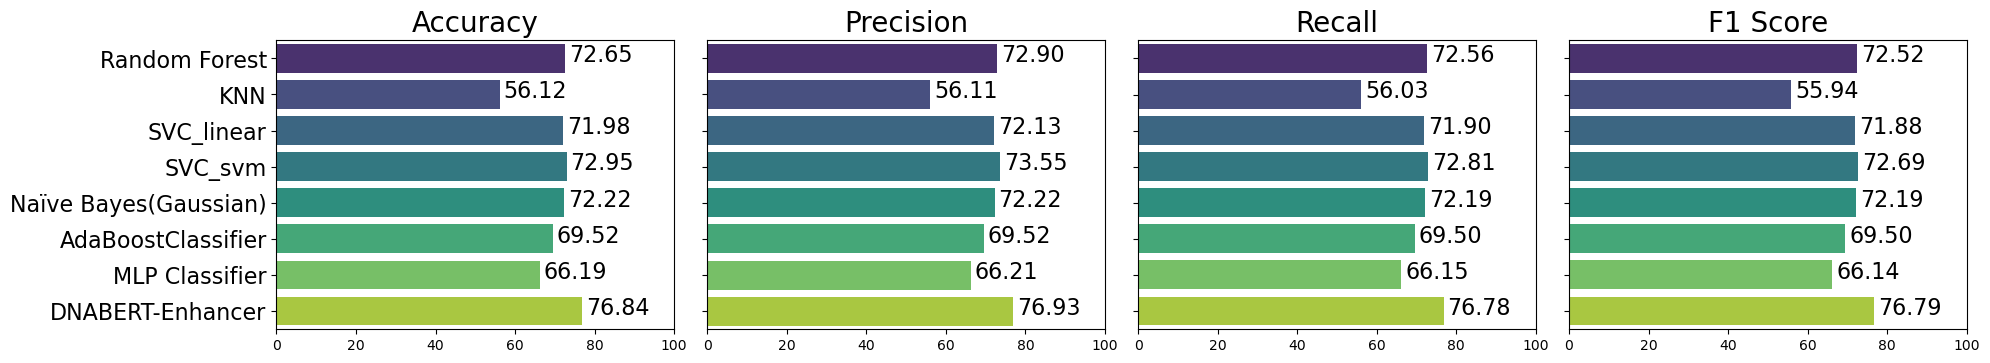

In [14]:
plot_results(results_df)